XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): ReLU()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1000/10000, Loss = 0.13272927937237
Epoch 2000/10000, Loss = 0.13223592210852075
Epoch 3000/10000, Loss = 0.13247996004338347
Epoch 4000/10000, Loss = 0.13273327170099947
Epoch 5000/10000, Loss = 0.13250787786637375
Epoch 6000/10000, Loss = 0.13288502055365825
Epoch 7000/10000, Loss = 0.13272855479851842
Epoch 8000/10000, Loss = 0.13273427388041625
Epoch 9000/10000, Loss = 0.13277523385113454
Epoch 10000/10000, Loss = 0.1328024364884186
Total parameters: 9
Input =  tensor([0., 1.])
Output =  0.9925655126571655


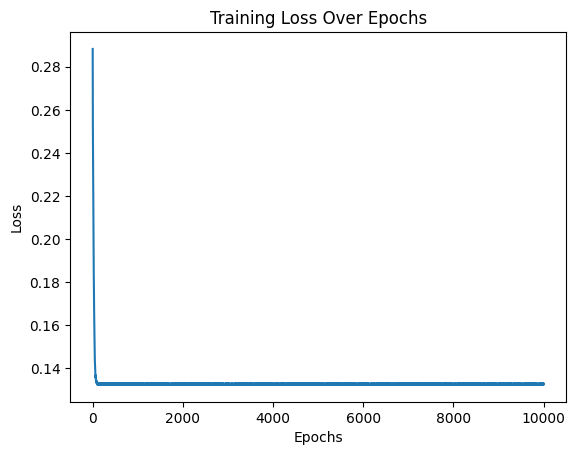

In [2]:
import torch
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn

loss_list = []
torch.manual_seed(42)

x = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y = torch.tensor([0, 1, 1, 0], dtype=torch.float32)

class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.ReLU()  # Change activation function
        self.linear2 = nn.Linear(2, 1, bias=True)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        return x

class MyDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
dataset = MyDataset(x, y)
batch_size = 1
train_data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

model = XORModel().to(device)
print(model)

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

def train_one_epoch(epoch_index):
    total_loss = 0
    for i, data in enumerate(train_data_loader):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = loss_fn(outputs.flatten(), labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / (len(train_data_loader) * batch_size)

EPOCHS = 10000
for epoch in range(1, EPOCHS + 1):
    model.train(True)
    avg_loss = train_one_epoch(epoch)
    loss_list.append(avg_loss)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}/{EPOCHS}, Loss = {avg_loss}")

total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params}")

input_data = torch.tensor([0., 1.]).to(device)
model.eval()
print("Input = ", input_data)
print("Output = ", model(input_data).item())

plt.plot(loss_list)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.show()


In [3]:
# Extracting weights and biases
linear1_weight, linear1_bias = model.linear1.weight.data, model.linear1.bias.data
linear2_weight, linear2_bias = model.linear2.weight.data, model.linear2.bias.data

# Displaying weights and biases
print("Linear1 Weight:\n", linear1_weight)
print("Linear1 Bias:\n", linear1_bias)
print("Linear2 Weight:\n", linear2_weight)
print("Linear2 Bias:\n", linear2_bias)


Linear1 Weight:
 tensor([[ 0.6139,  0.6554],
        [-0.6774,  0.6844]])
Linear1 Bias:
 tensor([-0.6271, -0.0178])
Linear2 Weight:
 tensor([[-0.7764,  0.7782]])
Linear2 Bias:
 tensor([0.4958])


In [4]:
# Manually calculating output for Linear1
linear1_output = torch.matmul(x, linear1_weight.t()) + linear1_bias
linear1_activation_output = model.activation1(linear1_output)

# Manually calculating output for Linear2
linear2_output = torch.matmul(linear1_activation_output, linear2_weight.t()) + linear2_bias
final_output = model.activation1(linear2_output)

# Displaying manual calculation results
print("Manual Calculation for Linear1 Output:\n", linear1_output)
print("Manual Calculation for Linear1 Activation Output:\n", linear1_activation_output)
print("Manual Calculation for Linear2 Output:\n", linear2_output)
print("Manual Calculation for Final Output:\n", final_output)


Manual Calculation for Linear1 Output:
 tensor([[-0.6271, -0.0178],
        [ 0.0282,  0.6666],
        [-0.0132, -0.6953],
        [ 0.6421, -0.0109]])
Manual Calculation for Linear1 Activation Output:
 tensor([[0.0000, 0.0000],
        [0.0282, 0.6666],
        [0.0000, 0.0000],
        [0.6421, 0.0000]])
Manual Calculation for Linear2 Output:
 tensor([[ 0.4958],
        [ 0.9926],
        [ 0.4958],
        [-0.0028]])
Manual Calculation for Final Output:
 tensor([[0.4958],
        [0.9926],
        [0.4958],
        [0.0000]])


100%|███████████████████████████| 9912422/9912422 [00:00<00:00, 23562251.87it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|███████████████████████████████| 28881/28881 [00:00<00:00, 31636378.64it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|████████████████████████████| 1648877/1648877 [00:00<00:00, 5373911.87it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████████████████████████████| 4542/4542 [00:00<00:00, 9247829.50it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Classification Accuracy: 96.76%
Confusion Matrix:
[[ 959    1    2    0    2    5    6    1    2    2]
 [   0 1127    2    1    0    0    1    0    4    0]
 [   5    0 1004    5    3    0    2    7    6    0]
 [   0    5    6  954    0   22    1    7   13    2]
 [   0    2    6    0  957    0    1    5    0   11]
 [   2    2    0    1    2  875    2    1    5    2]
 [   3    4    4    0    4   16  915    0   12    0]
 [   1    8   14    1    1    0    0  995    2    6]
 [   1    1    2    6    1    6    1    3  953    0]
 [   4    5    0    5   28    6    1   10   13  937]]


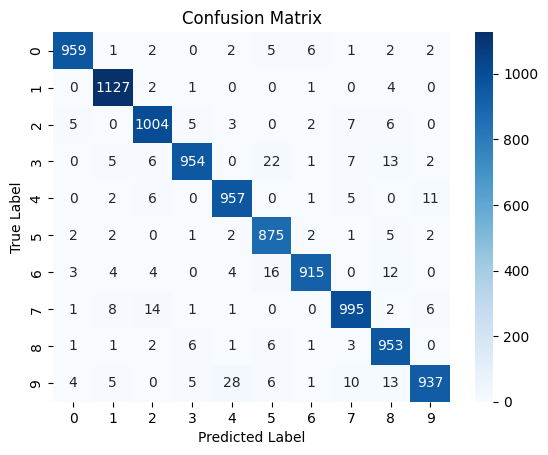

Total number of learnable parameters: 109386


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

# Set random seed for reproducibility
torch.manual_seed(42)

# Load MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

# Define the neural network model
class FFNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, num_classes):
        super(FFNN, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size2, num_classes)

    def forward(self, x):
        x = self.flatten(x)
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x

# Model parameters
input_size = 28 * 28  # MNIST image size
hidden_size1 = 128
hidden_size2 = 64
num_classes = 10

# Instantiate the model
model = FFNN(input_size, hidden_size1, hidden_size2, num_classes)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    for images, labels in train_loader:
        images = images.view(-1, 28 * 28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Evaluate the model on the test set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images = images.view(-1, 28 * 28)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(all_labels, all_preds)
conf_matrix = confusion_matrix(all_labels, all_preds)

# Display results
print(f"Classification Accuracy: {accuracy * 100:.2f}%")
print(f"Confusion Matrix:\n{conf_matrix}")

# Display confusion matrix as a heatmap
class_names = [str(i) for i in range(10)]
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Display the number of learnable parameters in the model
total_params = sum(p.numel() for p in model.parameters())
print(f"Total number of learnable parameters: {total_params}")
